# Bab 9: Unsupervised Learning (Pembelajaran Tanpa Pengawasan)

### 1. Pendahuluan

Bab 9 beralih dari ranah *supervised learning* (yang melibatkan data berlabel) ke *unsupervised learning*. Dalam *unsupervised learning*, data tidak memiliki label target. Tujuannya adalah untuk menemukan pola tersembunyi atau struktur intrinsik dalam data.

Beberapa tugas *unsupervised learning* yang umum dibahas dalam bab ini meliputi:
* **Clustering (Pengelompokan):** Mengelompokkan *instance* serupa ke dalam *cluster*.
* **Density Estimation (Estimasi Kepadatan):** Menentukan distribusi probabilitas *instance* dalam ruang fitur.
* **Anomaly Detection (Deteksi Anomali):** Mengidentifikasi *instance* yang menyimpang dari sebagian besar data.
* **Visualization and Dimensionality Reduction (Visualisasi dan Reduksi Dimensi):** (Sudah dibahas sebagian di Bab 8) untuk menampilkan data berdimensi tinggi dalam 2D/3D atau menguranginya.

Bab ini akan berfokus pada algoritma *clustering* (K-Means, DBSCAN, Gaussian Mixtures) dan beberapa teknik lain yang relevan.

### 2. Clustering (Pengelompokan)

*Clustering* adalah tugas untuk membagi data menjadi kelompok-kelompok (*cluster*) sehingga *instance* dalam satu kelompok lebih mirip satu sama lain dibandingkan dengan *instance* di kelompok lain. Ini adalah alat yang hebat untuk analisis data, segmentasi pelanggan, sistem rekomendasi, dan banyak lagi.

#### a. K-Means

K-Means adalah salah satu algoritma *clustering* yang paling sederhana dan paling populer.
**Prinsip Kerja:**
1.  Inisialisasi $k$ *centroid* secara acak (yaitu, $k$ titik acak dalam ruang data).
2.  **Assignment Step:** Setiap *instance* ditetapkan ke *centroid* terdekatnya.
3.  **Update Step:** *Centroid* dipindahkan ke lokasi rata-rata dari semua *instance* yang ditetapkan ke *cluster* mereka.
4.  Langkah 2 dan 3 diulang sampai *centroid* tidak bergerak secara signifikan (konvergensi) atau jumlah iterasi maksimum tercapai.

**Fungsi Biaya (Inertia):** K-Means mencoba meminimalkan inersia, yang merupakan jumlah kuadrat jarak antara setiap *instance* dan *centroid*nya.
$$ J = \sum_{i=1}^{m} \| \mathbf{x}^{(i)} - \boldsymbol{\mu}_{\text{label}(\mathbf{x}^{(i)})} \|^2 $$
di mana $\boldsymbol{\mu}_{\text{label}(\mathbf{x}^{(i)})}$ adalah *centroid* dari *cluster* yang ditetapkan untuk *instance* $\mathbf{x}^{(i)}$.

**Masalah Inisialisasi:** K-Means dapat terjebak dalam *local optimum* yang buruk karena inisialisasi *centroid* yang acak.
* **Solusi:** Jalankan algoritma K-Means beberapa kali dengan inisialisasi acak yang berbeda dan pilih model dengan inersia terendah. Parameter `n_init` di Scikit-Learn mengontrol berapa kali algoritma dijalankan dengan inisialisasi yang berbeda.
* **K-Means++:** Ini adalah strategi inisialisasi yang lebih cerdas yang memastikan *centroid* yang diinisialisasi cenderung tersebar. Scikit-Learn menggunakan K-Means++ secara *default`.

**Menemukan Jumlah Cluster Optimal ($k$):**
Tidak ada cara langsung untuk menentukan $k$ optimal karena K-Means adalah algoritma *unsupervised*.
* **Inersia:** Plot inersia sebagai fungsi dari $k$. Carilah "tikungan siku" (*elbow*) pada plot, di mana penurunan inersia mulai melambat secara signifikan.
* **Silhouette Score:** Ini adalah metrik yang lebih baik. *Silhouette score* adalah rata-rata *silhouette coefficient* setiap *instance*. *Silhouette coefficient* untuk satu *instance* adalah:
    $$ s = \frac{b - a}{\max(a, b)} $$
    di mana $a$ adalah jarak rata-rata ke *instance* lain di *cluster* yang sama, dan $b$ adalah jarak rata-rata ke *instance* di *cluster* terdekat berikutnya.
    * Nilai mendekati +1 menunjukkan *instance* jauh di dalam *cluster*nya sendiri dan jauh dari *cluster* lain.
    * Nilai mendekati 0 menunjukkan *instance* berada di atau dekat batas antara dua *cluster*.
    * Nilai mendekati -1 menunjukkan *instance* mungkin berada di *cluster* yang salah.
    Skor siluet global adalah rata-rata semua skor siluet *instance*.

**Keterbatasan K-Means:**
* Memerlukan penentuan $k$ sebelumnya.
* Tidak fleksibel terhadap *cluster* yang tidak berbentuk lingkaran.
* Tidak baik dalam menangani *cluster* dengan kepadatan yang sangat berbeda.

#### b. Batas Pre-processing dan Post-processing
K-Means dapat digunakan untuk pra-pemrosesan data sebagai bentuk reduksi dimensi (yaitu, mengganti *instance* dengan jarak ke *centroid*). Ini juga dapat membantu dalam deteksi anomali.

#### c. Propagasi Batas (Mini-Batch K-Means)
Mini-Batch K-Means adalah varian K-Means yang dapat menangani dataset yang sangat besar (*out-of-core*) dengan memproses *mini-batches* *instance* pada setiap langkah. Ini jauh lebih cepat daripada K-Means standar, meskipun kadang-kadang menghasilkan inersia yang sedikit lebih tinggi.

#### d. Meringkas Algoritma Clustering

| Algoritma | Pro            | Kontra              | Parameter Penting |
| :-------- | :------------- | :------------------ | :---------------- |
| K-Means   | Cepat, skalabel, mudah diinterpretasikan | Perlu $k$, tidak fleksibel untuk bentuk non-bulat, sensitif terhadap *outlier* | `n_clusters`      |
| DBSCAN    | Tidak perlu $k$, mendeteksi *cluster* berbentuk aneh, mendeteksi *noise* | Sensitif terhadap parameter, tidak baik untuk *cluster* kepadatan bervariasi | `eps`, `min_samples` |
| Gaussian Mixtures | Fleksibel (berbagai bentuk cluster), probabilistik | Perlu $k$, lambat untuk banyak fitur | `n_components`, `covariance_type` |

### 3. DBSCAN

*DBSCAN (Density-Based Spatial Clustering of Applications with Noise)* adalah algoritma *clustering* berbasis kepadatan. Ini mampu menemukan *cluster* berbentuk arbitrer dan mengidentifikasi *outlier* (titik *noise*).

**Konsep Inti:**
* **$\epsilon$-neighborhood:** Lingkaran dengan radius $\epsilon$ di sekitar suatu *instance*.
* **Core instance:** *Instance* yang memiliki setidaknya `min_samples` *instance* (termasuk dirinya sendiri) dalam $\epsilon$-neighborhood-nya.
* **Border instance:** *Instance* yang memiliki kurang dari `min_samples` *instance* dalam $\epsilon$-neighborhood-nya, tetapi terletak dalam $\epsilon$-neighborhood dari *core instance* lain.
* **Noise instance:** *Instance* yang bukan *core instance* maupun *border instance*.

**Prinsip Kerja:**
1.  Algoritma dimulai dari *instance* acak.
2.  Jika *instance* adalah *core instance*, ia memulai *cluster* baru yang berisi semua *instance* yang dapat dijangkau dari *core instance* tersebut (termasuk *core* dan *border instance* lainnya).
3.  Jika *instance* bukan *core instance* tetapi merupakan *border instance*, ia ditetapkan ke *cluster* yang dimulai oleh *core instance* yang berdekatan.
4.  Jika tidak, itu dianggap *noise*.
5.  Proses berlanjut hingga semua *instance* dikunjungi.

**Kelebihan DBSCAN:**
* Tidak memerlukan penetapan jumlah *cluster* (`k`).
* Mampu menemukan *cluster* dengan bentuk dan ukuran arbitrer.
* Mampu mengidentifikasi *noise*.

**Kekurangan DBSCAN:**
* Sensitif terhadap *hyperparameter* (`eps` dan `min_samples`).
* Tidak efektif untuk *cluster* dengan kepadatan yang sangat berbeda.
* Tidak baik untuk data berdimensi sangat tinggi.

Contoh implementasi dengan `DBSCAN` dari Scikit-Learn ditunjukkan.

### 4. Gaussian Mixtures (Campuran Gaussian)

Model *Gaussian Mixture* (GMM) adalah model probabilistik yang mengasumsikan bahwa *instance* dihasilkan dari campuran beberapa distribusi Gaussian. Berbeda dengan K-Means yang menetapkan setiap *instance* ke satu *cluster* (klasifikasi *hard*), GMM melakukan klasifikasi *soft* (probabilistik), mengestimasi probabilitas bahwa suatu *instance* termasuk dalam *cluster* tertentu.

**Prinsip Kerja (Expectation-Maximization - EM):**
1.  **Initialization:** Inisialisasi parameter distribusi Gaussian (mean, covariance, bobot prior) secara acak.
2.  **Expectation (E) Step:** Untuk setiap *instance*, hitung probabilitas bahwa *instance* tersebut termasuk dalam setiap *cluster* (Gaussian).
3.  **Maximization (M) Step:** Perbarui parameter masing-masing Gaussian untuk memaksimalkan probabilitas ini, dengan mempertimbangkan semua *instance* yang telah ditetapkan ke Gaussian tersebut.
4.  Ulangi langkah 2 dan 3 sampai konvergensi.

**Hyperparameter penting:**
* `n_components`: Jumlah komponen Gaussian (analog dengan `k` di K-Means).
* `covariance_type`: Mengontrol bentuk *covariance matrix* dari setiap Gaussian (`full`, `tied`, `diag`, `spherical`).

**Deteksi Anomali dengan GMM:**
GMM dapat digunakan untuk deteksi anomali dengan mengidentifikasi *instance* yang memiliki kepadatan rendah (yaitu, probabilitas rendah untuk dihasilkan oleh model campuran). Anda dapat menentukan ambang batas kepadatan.

**Kelebihan GMM:**
* Fleksibel untuk membentuk *cluster* non-bulat atau bervariasi dalam ukuran/orientasi.
* Menyediakan estimasi probabilitas keanggotaan *cluster* (klasifikasi *soft*).
* Dapat digunakan untuk deteksi anomali.

**Kekurangan GMM:**
* Memerlukan penentuan `n_components` sebelumnya.
* Dapat menjadi lambat pada dataset yang sangat besar.
* Rentang konvergensi tergantung pada inisialisasi.

Contoh implementasi dengan `GaussianMixture` dari Scikit-Learn ditunjukkan.

### 5. Konsep Dasar Lainnya dalam Pembelajaran Tanpa Pengawasan (Other Unsupervised Learning Tasks)

* **Density Estimation:** Estimasi fungsi kepadatan probabilitas (PDF) dari data. GMM adalah metode yang baik untuk ini.
* **Anomaly Detection (Outlier Detection):** Mengidentifikasi *instance* yang berbeda dari sebagian besar data. Ini berbeda dari *novelty detection*, di mana model dilatih pada dataset "bersih" dan kemudian mengidentifikasi *instance* baru yang menyimpang.
* **Novelty Detection:** Mendeteksi *instance* baru yang berbeda dari distribusi data yang telah dilatih.

Beberapa algoritma deteksi anomali:
* **PCA (dengan *reconstruction error*):** Anomali memiliki *reconstruction error* yang tinggi.
* **Gaussian Mixtures:** Anomali memiliki kepadatan rendah.
* **Isolation Forest:** Membangun pohon secara acak untuk mengisolasi anomali.
* **One-Class SVM:** Model batas keputusan di sekitar data "normal" dan menandai apa pun di luar batas sebagai anomali.

### 6. Kesimpulan

Bab 9 menyajikan pengantar yang komprehensif untuk *unsupervised learning*, berfokus pada teknik *clustering* yang paling populer (K-Means, DBSCAN, Gaussian Mixtures) dan penggunaannya. Konsep-konsep seperti inersia, *silhouette score*, *core instance*, dan *soft clustering* dijelaskan secara rinci. Bab ini juga menyentuh aplikasi penting seperti estimasi kepadatan dan deteksi anomali, memberikan pemahaman tentang bagaimana menemukan struktur tersembunyi dan pola yang tidak biasa dalam data tanpa label.


## 1. Clustering

### K-Means
#### Generating some blobs data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

### Training K-Means

In [2]:
from sklearn.cluster import KMeans

# n_init was introduced to avoid local optima, running algorithm n_init times
# and picking the best result based on inertia.
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # n_init is now a required parameter
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [3]:
kmeans.labels_ # Cluster labels for each instance

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 3, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 3, 2, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 3, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [4]:
kmeans.cluster_centers_ # Coordinates of the cluster centroids

array([[-2.50173875,  9.03287546],
       [-6.74543497, -6.81351756],
       [ 4.65760511,  2.0269603 ],
       [-8.85662684,  7.41339818]])

In [5]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 0, 0], dtype=int32)

In [6]:
kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center

1948.7329193856833

### Finding the Optimal Number of Clusters (Elbow Method & Silhouette Score)




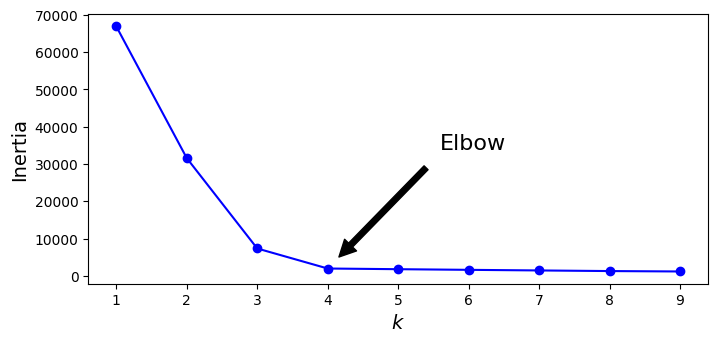

In [8]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plotting the elbow curve would require matplotlib
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel(r"$k$", fontsize=14) # Perbaikan di sini
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

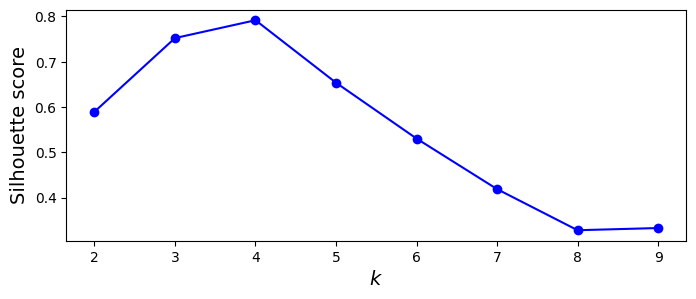

In [9]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]] # Start from k=2

# Plotting the silhouette scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel(r"$k$", fontsize=14) # Perbaikan di sini
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### Pre-processing and Post-processing

In [10]:
# K-Means as a preprocessing step (example: feature scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=4, random_state=42, n_init=10))
])
pipeline.fit(X)
X_transformed = pipeline.transform(X) # Distances to cluster centroids

In [11]:
# Alternatively, using a dedicated transformer (not in Scikit-Learn by default,
# but can be created, or sometimes KMeansTransformer is used for this purpose in examples)
# Example of using KMeans as a transformer:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
X_dist = kmeans.transform(X)

### Mini-Batch K-Means

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, n_init=10)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=4, n_init=10, random_state=42)

## 2. DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons # Using moons dataset for DBSCAN example

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5) # eps: max distance between samples, min_samples: min samples in a neighborhood
dbscan.fit(X)

DBSCAN(eps=0.2)

In [14]:
dbscan.labels_ # -1 indicates noise points

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [15]:
# Accessing core samples
dbscan.core_sample_indices_
dbscan.components_ # Core samples

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]], shape=(1000, 2))

In [17]:
# Evaluating DBSCAN (using external metrics if true labels are available)
from sklearn.metrics import accuracy_score
from scipy.stats import mode
# Note: DBSCAN doesn't assign class labels directly, so mapping is needed.
# This part of the book typically shows a custom mapping function or visualization.
# For example, to check the accuracy of assigned clusters assuming some mapping:
y_pred = dbscan.labels_
# Map each cluster label to the most frequent true label in that cluster
mapped_y_pred = np.full_like(y_pred, fill_value=-1)
for label in unique_labels:
    mask = (y_pred == label)
    if np.any(mask):
        mapped_label = mode(y[mask], keepdims=True)[0][0]
        mapped_y_pred[mask] = mapped_label
accuracy_score(y[y_pred != -1], mapped_y_pred[y_pred != -1])

1.0

## 3. Gaussian Mixtures

In [18]:
from sklearn.mixture import GaussianMixture

# Creating some data for Gaussian Mixture
X_gm, y_gm = make_blobs(n_samples=1000, centers=3, cluster_std=[0.5, 1.5, 2.5], random_state=42)

# Default is full covariance_type
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_gm)

GaussianMixture(n_components=3, random_state=42)

In [19]:
gm.weights_ # Weights of each Gaussian component

array([0.334     , 0.33299449, 0.33300551])

In [20]:
gm.means_ # Mean of each Gaussian component

array([[-2.51666971,  9.00911449],
       [ 4.77304845,  2.09682169],
       [-6.84681008, -6.6427242 ]])

In [21]:
gm.covariances_ # Covariance matrix of each Gaussian component

array([[[ 2.53921159e-01,  1.42669540e-03],
        [ 1.42669540e-03,  2.36517868e-01]],

       [[ 1.82317110e+00, -1.51827321e-01],
        [-1.51827321e-01,  2.46023542e+00]],

       [[ 5.95063112e+00,  3.95507586e-01],
        [ 3.95507586e-01,  6.47030586e+00]]])

In [22]:
gm.predict(X_gm[:10]) # Hard assignment to components

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1])

In [23]:
gm.predict_proba(X_gm[:10]) # Soft assignment (probabilities)

array([[3.81951763e-261, 2.50437659e-024, 1.00000000e+000],
       [1.15458111e-214, 7.99806429e-019, 1.00000000e+000],
       [6.06731868e-099, 9.99999991e-001, 8.72793745e-009],
       [1.00000000e+000, 3.10067830e-011, 4.39292068e-010],
       [9.99999998e-001, 2.04987973e-010, 1.84092384e-009],
       [1.65757796e-226, 1.20328287e-023, 1.00000000e+000],
       [1.21481006e-085, 9.99999994e-001, 5.53850670e-009],
       [2.20530504e-101, 9.99999998e-001, 2.46515460e-009],
       [1.05313656e-070, 9.99999997e-001, 3.04867387e-009],
       [1.66255637e-131, 9.99999987e-001, 1.31613512e-008]])

In [24]:
# To generate new samples from the model
X_new_gm, y_new_gm = gm.sample(6)

### Anomaly Detection using Gaussian Mixtures

In [25]:
# Score samples returns the log-likelihood of each sample under the model
# Lower scores indicate lower density (potential anomalies)
densities = gm.score_samples(X_gm)

In [26]:
# Set a threshold for anomaly detection
threshold = np.percentile(densities, 4) # e.g., bottom 4% are anomalies
anomalies = X_gm[densities < threshold]

# This part would involve plotting the densities and identified anomalies.

### Selecting Number of Components (BIC or AIC)

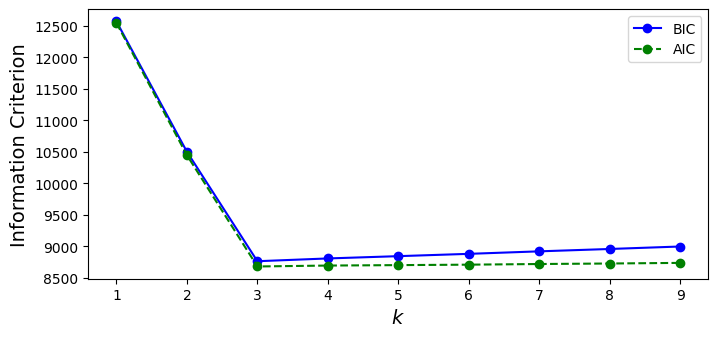

In [30]:
# Use BIC (Bayesian Information Criterion) or AIC (Akaike Information Criterion)
# to select the optimal number of components for GMMs.
# Lower BIC/AIC is generally better.
bics = [gm.bic(X_gm) for gm in [GaussianMixture(n_components=k, random_state=42).fit(X_gm)
                               for k in range(1, 10)]]
aics = [gm.aic(X_gm) for gm in [GaussianMixture(n_components=k, random_state=42).fit(X_gm)
                               for k in range(1, 10)]]

# Plotting BIC and AIC
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), bics, "bo-", label="BIC")
plt.plot(range(1, 10), aics, "go--", label="AIC")
plt.xlabel(r"$k$", fontsize=14) # Perbaikan di sini
plt.ylabel("Information Criterion", fontsize=14)
plt.legend()
plt.show()

### Variational Bayesian Gaussian Mixtures

In [28]:
from sklearn.mixture import BayesianGaussianMixture

# BayesianGaussianMixture can automatically select the number of components
# by driving the weights of unnecessary components to zero.
bgm = BayesianGaussianMixture(n_components=10, random_state=42, n_init=10)
bgm.fit(X_gm)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [29]:
# Weights of the components after fitting (some will be very close to zero)
bgm.weights_.round(2)

array([0.33, 0.33, 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])